In [2]:
import os
os.chdir('..')


In [3]:

import nmrglue as ng
import numpy as np
from cops_analysis import cops_analyze
from cops_prediction import gaussian, int_seq_match, print_probabilities
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering

In [4]:
%%time
b = cops_analyze(['./SHP2_Gradcops/SHP2_Grad1.ft3',
                  './SHP2_Gradcops/SHP2_Grad3.ft3',
                  './SHP2_Gradcops/SHP2_Grad5.ft3',
                  './SHP2_Gradcops/SHP2_Grad6.ft3'],
                 mode='HNCA', cop_num=[1,2,4,5], pyruvate_on=False)




CPU times: user 11.5 s, sys: 8.28 s, total: 19.8 s
Wall time: 19.8 s


In [56]:

#removed index 342: CA way too low!
tb = pd.read_csv('./dev/SHP2_processed.csv', sep='\t')
tb = tb.rename(columns={'w1':'HN','w2':'CA','w3':'N'})
tb = tb.drop([342])
tb = tb.reset_index()

#realign spectra
shifts_array = tb[['CA', 'N','HN']].to_numpy(dtype=np.float32)
shifts_array[:,[0,1]]=shifts_array[:,[1,0]]

2604
[121.19992  51.98995   8.47183]
CPU times: user 823 ms, sys: 12.1 ms, total: 835 ms
Wall time: 837 ms


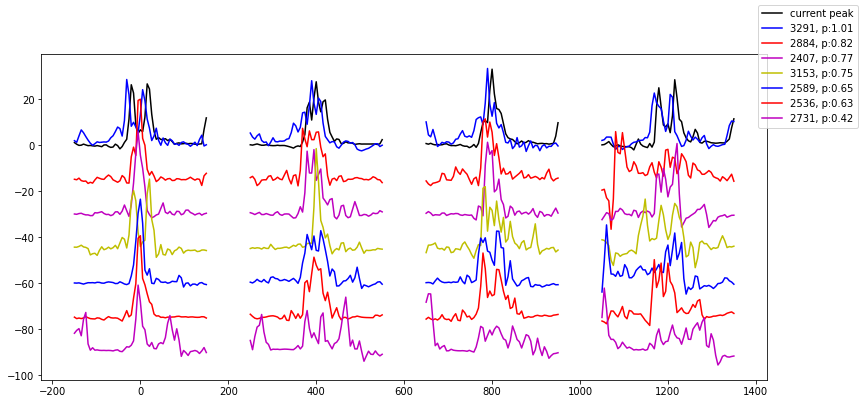

In [57]:
%%time
a = int_seq_match(b, peak_table_dir = tb, cops_mode='HNCA')
index = 188
print(tb['Assignment'][index])
print(shifts_array[index])
df, fig = a.find_best_matches(shifts_array[index], snr=25,gen_plot=True, verbose=False, sequential_mode=True)

In [58]:
%%time
prediction = []
for ind, row in tb[~tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=True)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no sequential peak within CA range."])
        pass

tb.loc[~tb['is_sequential'], 'prediction'] = prediction

CPU times: user 1.28 s, sys: 4.53 ms, total: 1.29 s
Wall time: 1.29 s


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/dtypes/missing.py:550: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val, copy=False)
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of list

In [59]:
%%time
prediction = []
for ind, row in tb[tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=False)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no internal peak within CA range."])
        pass

tb.loc[tb['is_sequential'], 'prediction'] = prediction

CPU times: user 1.25 s, sys: 12.2 ms, total: 1.26 s
Wall time: 1.26 s


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [60]:
tb

,index,HN,CA,N,Assign F1,Assign F2,Assign F3,is_sequential,Assignment,prediction
0,0,7.60125,48.55583,129.36499,{424}[1636],{424}[1637],{424}[1635],False,1637,"[[2361, 1.13]]"
1,1,7.35108,57.50206,127.61668,{425}[1641],{425}[1642],{425}[1640],False,1642,"[[3336, 0.83], [1904, 0.6], [1742, 0.59], [231..."
2,2,7.10819,57.57096,124.96531,{427}[1646],{427}[1647],{427}[1645],False,1647,"[[1904, 1.07], [3539, 0.74], [1702, 0.68], [24..."
3,3,7.05406,63.28477,124.82412,{428}[1651],{428}[1653],{428}[1650],False,1653,"[[2376, 0.71]]"
4,4,7.18180,52.88781,123.71404,{429}[1656],{429}[1657],{429}[1655],False,1657,"[[2053, 1.05], [3443, 0.88], [2335, 0.63], [22..."
...,...,...,...,...,...,...,...,...,...,...
740,741,8.54611,59.58806,117.40428,{831}[3579],[3638],{831}[3578],True,3638,"[[2766, 0.52], [2819, 0.37], [2829, 0.3], [361..."
741,742,7.96637,53.08762,121.39876,{832}[3584],[3591],{832}[3583],True,3591,"[[3219, 0.33], [2558, 0.3], [2297, 0.22], [181..."
742,743,7.98456,53.74604,121.28429,{833}[3589],[3631],{833}[3588],True,3631,"[[2033, 0.64], [2814, 0.55], [2425, 0.45], [26..."
743,744,8.48577,55.27238,121.10343,{836}[3600],[3603],{836}[3599],True,3603,"[[3016, 0.86], [3561, 0.85], [3002, 0.84], [30..."


In [141]:
for i, row in tb.iterrows():
    #print(row['prediction'][0][0])
    #print(row['Assignment'])
    try:
        #check existence of sequential or internal
        nextrow_assign = row['Assignment']+1-2*row['is_sequential']
        assert(tb[tb['Assignment']==nextrow_assign].to_numpy().any())  
        best_matchrow = tb[tb['Assignment']==int(row['prediction'][0][0])]
        bmr_assignment = int(best_matchrow.iloc[0]['prediction'][0][0])
        tb.loc[i,'assignable']=row['Assignment']==bmr_assignment and row['prediction'][0][1]>=0.6 and best_matchrow.iloc[0]['prediction'][0][1]>=0.6
        assert(tb.loc[i,'assignable'])
        tb.loc[i,'nextrow_edge']=nextrow_assign
        tb.loc[i,'bmr_edge']=int(row['prediction'][0][0])
    except:
        tb.loc[i,'assignable']=False
        tb.loc[i,'nextrow_edge']=0
        tb.loc[i,'bmr_edge']=0


In [142]:
tb['nextrow_edge']=tb['nextrow_edge'].astype(int)
tb['bmr_edge']=tb['bmr_edge'].astype(int)
tb['nextrow_edge']=tb.apply(lambda e: (e['Assignment'], e['nextrow_edge']), axis=1)
tb['bmr_edge']=tb.apply(lambda e: (e['Assignment'], e['bmr_edge']), axis=1)

In [143]:
tb[tb['Assignment']==2330]

,index,HN,CA,N,Assign F1,Assign F2,Assign F3,is_sequential,Assignment,prediction,assignable,nextrow_edge,bmr_edge
134,134,8.44148,42.34225,115.10528,{566}[2327],{566}[2330],{566}[2326],False,2330,"[[3276, 0.88], [3637, 0.87], [3210, 0.73], [28...",False,"(2330, 0)","(2330, 0)"


In [147]:
import networkx as nx

In [165]:
G = nx.Graph()
G.add_nodes_from(tb[tb['assignable']]['Assignment'])
G.add_edges_from(tb[tb['assignable']]['nextrow_edge'])
G.add_edges_from(tb[tb['assignable']]['bmr_edge'])

# for i, row in tb[np.array(~tb['is_sequential']*tb['assignable'], dtype=bool)].iterrows():
#     G = nx.contracted_nodes(G, row['Assignment'], row['nextrow_edge'][1])

# G.remove_edges_from(nx.selfloop_edges(G))

In [204]:
gen = (G.subgraph(c) for c in nx.connected_components(G))
pd.set_option('display.width', 1000)

paths = pd.DataFrame()

for i, sg in enumerate(gen):
    try:
        t = nx.eulerian_path(sg)
        for i, edge in enumerate(t):
            if i==0:
                paths = pd.concat([paths, pd.DataFrame({'HN':[0],'CA':[0],'N':[0],'Assignment':[0],'prediction':[None]}, index=[-1])], axis=0)
                paths = pd.concat([paths, tb[tb['Assignment']==edge[0]][['HN','CA','N', 'Assignment', 'prediction']]])
            paths = pd.concat([paths, tb[tb['Assignment']==edge[1]][['HN','CA','N', 'Assignment', 'prediction']]])
    except:
        pass
        

In [205]:
paths[0] = paths.index
paths.rename(columns={0:'original index'})
pd.set_option('display.max_rows',1000)
paths

,HN,CA,N,Assignment,prediction,0
-1,0.00000,0.00000,0.00000,0,None,-1
440,8.06955,56.33360,125.94936,1953,"[[1734, 0.44], [2272, 0.41], [2455, 0.41], [29...",440
60,8.06935,49.60471,126.02672,1952,"[[1638, 0.89], [3003, 0.46], [2629, 0.43], [28...",60
382,7.60283,49.62205,129.35068,1638,"[[1952, 0.89], [1846, 0.76], [2278, 0.74], [25...",382
0,7.60125,48.55583,129.36499,1637,"[[2361, 1.13]]",0
515,8.65098,48.52410,117.58161,2361,"[[1637, 1.13], [1942, 0.5]]",515
140,8.65198,51.04392,117.58161,2360,"[[2555, 1.14], [2315, 0.78], [1833, 0.71], [24...",140
553,8.53275,51.03248,123.85736,2555,"[[2360, 1.14], [3261, 1.07], [3360, 0.84], [29...",553
178,8.53277,57.36385,123.85736,2554,"[[2331, 1.08], [1742, 0.81], [3633, 0.78], [18...",178
509,8.44062,57.38653,115.06525,2331,"[[2554, 1.08], [2669, 0.74], [2470, 0.5], [285...",509


In [206]:
paths.to_csv('./dev/shp2_plots/shp2_paths.csv', index_label=False)

In [167]:
tb[tb['Assignment']==2009]

,index,HN,CA,N,Assign F1,Assign F2,Assign F3,is_sequential,Assignment,prediction,assignable,nextrow_edge,bmr_edge
449,450,7.18522,51.27014,120.81267,{500}[2006],[2009],{500}[2005],True,2009,"[[2385, 0.87], [3326, 0.57], [3118, 0.57], [23...",False,"(2009, 0)","(2009, 0)"


,HN,CA,N,Assignment,prediction
0,0,0,0,0,None
